<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-библиотек-и-данных" data-toc-modified-id="Загрузка-библиотек-и-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек и данных</a></span></li><li><span><a href="#Разбиваем-данные-на-выборки" data-toc-modified-id="Разбиваем-данные-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разбиваем данные на выборки</a></span></li><li><span><a href="#Предобработка-данных-для-обучения" data-toc-modified-id="Предобработка-данных-для-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных для обучения</a></span><ul class="toc-item"><li><span><a href="#Предобработка-обучающей-выборки" data-toc-modified-id="Предобработка-обучающей-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Предобработка обучающей выборки</a></span></li><li><span><a href="#Удаление-лишних-символов" data-toc-modified-id="Удаление-лишних-символов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Удаление лишних символов</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Удаление-стоп-слов" data-toc-modified-id="Удаление-стоп-слов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Удаление стоп-слов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Векторизация-текста" data-toc-modified-id="Векторизация-текста-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Векторизация текста</a></span></li><li><span><a href="#Предобработка-тестовой-выборки" data-toc-modified-id="Предобработка-тестовой-выборки-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Предобработка тестовой выборки</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>CatBoostClassifier</a></span></li><li><span><a href="#Итоги-работы-моделей" data-toc-modified-id="Итоги-работы-моделей-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Итоги работы моделей</a></span></li></ul></li><li><span><a href="#Тестирование-самой-успешной-модели" data-toc-modified-id="Тестирование-самой-успешной-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование самой успешной модели</a></span><ul class="toc-item"><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-адекватность" data-toc-modified-id="Проверка-лучшей-модели-на-адекватность-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Проверка лучшей модели на адекватность</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Поиск токсичных комментариев для интернет-магазина товаров

## Описание проекта

Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.\
Необходимо создать модель (со значением метрики F1 >=0.75), которая будет классифицировать комментарии на позитивные и негативные. 

**План работы:**

1) Изучить исходные данные

2) Провести предобработку признаков: работа с пропусками, выбросами, лишники символами, стоп-словами и т.д.

3) Построить различные модели, обучить их и подобраны лучшие гиперпараметры для максимизации метрики F1

4) Сравнение результатов искомой метрики, выбор оптимальной модели, проверка ее на тестовой выборке.

5) Проверить адекватность лучшей модели. Подведение итогов.

**Описание данных**\
Датасет состоят из 2-ух столбцов: **text** в нём содержит текст комментария и **toxic** — целевой признак.

## Загрузка библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import torch
import transformers
import nltk
import spacy
import en_core_web_sm
import re
import spacy.lang.en

from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.dummy import DummyClassifier 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_tweets = pd.read_csv('D:/Практикум DS/Проекты/Работа с текстом/toxic_comments.csv')

In [3]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [4]:
df_tweets.describe()

,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


Токсичных комментариев эколо 10%.

Необходисо во всех моделях провести балансировку классов.

In [5]:
df_tweets.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
df_tweets = df_tweets.drop(['Unnamed: 0'], axis =1)

In [7]:
df_tweets.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


## Разбиваем данные на выборки

Разделим датасет на обучающую и тестовую выборку (тест 30%):

In [8]:
features_train, features_test, target_train, target_test = train_test_split(df_tweets['text'], df_tweets['toxic'], \
                                                test_size=0.3, random_state=12345)

In [9]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(111504,)
(47788,)
(111504,)
(47788,)


## Предобработка данных для обучения

### Предобработка обучающей выборки

In [10]:
features_train = features_train.reset_index(drop=True) # сброс индексов
target_train = target_train.reset_index(drop=True) # сброс индексов
print(features_train.head()) # проверка визуализацией
print(target_train.head()) # проверка визуализацией

0    US media conflated the NFL, PRG, VWP (in South...
1    There is no proof, no facts, and no verifiable...
2    THE MOTHERLODE\nhttp://www.rumely.com/History....
3    "\n\n""Give 'em hell, Give 'em Hell, Aggies Fu...
4    Rugby \n\nDoes no one know anything about him ...
Name: text, dtype: object
0    0
1    0
2    0
3    1
4    0
Name: toxic, dtype: int64


In [11]:
x = features_train.str.len() # вывод длины текстов
x

0          614
1          937
2           61
3          444
4          105
          ... 
111499     126
111500      31
111501    1651
111502     144
111503      51
Name: text, Length: 111504, dtype: int64

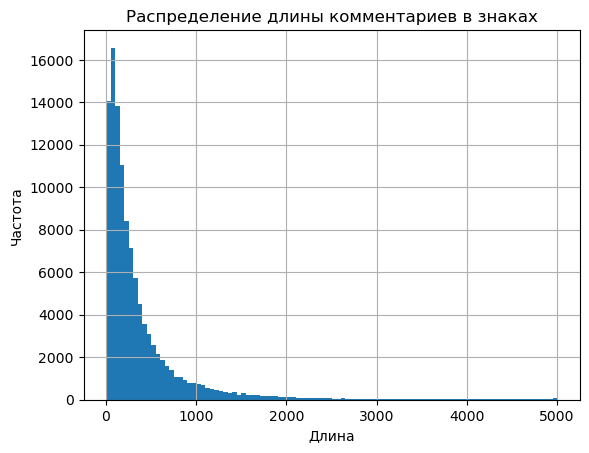

In [12]:
(
x.hist(bins = 100)
.set(title = 'Распределение длины комментариев в знаках', xlabel = 'Длина', ylabel = 'Частота')
);

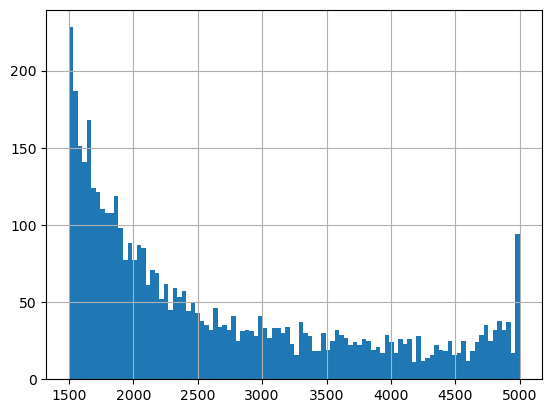

In [13]:
x.hist(bins = 100, range= (1500, 5000));

Берем статистическую информацию для нахождения границы выбросов

In [14]:
x.quantile(.99) # границf выбросов - 99-й  процентиль 

3427.970000000001

Комментарии от 3428 и ДЛИННЕЕ можно убрать из обучающего датасата как аномалии:

In [15]:
# делаем срез до 99% процентиля (3428 - длина комментария)
x = x.loc[x<3428]
x

0          614
1          937
2           61
3          444
4          105
          ... 
111499     126
111500      31
111501    1651
111502     144
111503      51
Name: text, Length: 110388, dtype: int64

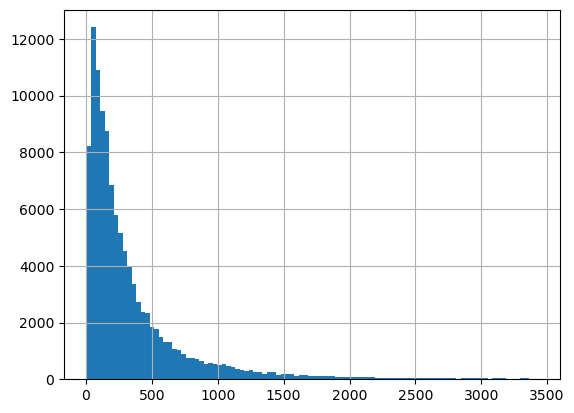

In [16]:
x.hist(bins = 100); #для проверки вывожу

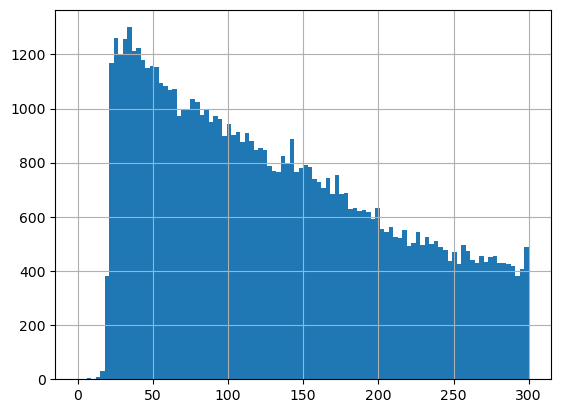

In [17]:
x.hist(bins = 100, range= (0, 300));

In [18]:
x.loc[x<15]

3506       6
41833     13
42402     12
57435     14
60729     14
64250      8
70323      6
88010      5
91595      8
91796     14
95909     14
99602      8
102335    13
Name: text, dtype: int64

Нулевых комментариев нет, а комментариев меньше 25 около 100. Они аномалиями не являются, оставляем.
Но могут быть комментарии, которые состоят только из символов, после очистки текста они могут стать нулевыми.

In [19]:
x = x.to_frame(name='lenght')
x['text'] = features_train
x['target'] = target_train
x

,lenght,text,target
0,614,"US media conflated the NFL, PRG, VWP (in South...",0
1,937,"There is no proof, no facts, and no verifiable...",0
2,61,THE MOTHERLODE\nhttp://www.rumely.com/History....,0
3,444,"""\n\n""""Give 'em hell, Give 'em Hell, Aggies Fu...",1
4,105,Rugby \n\nDoes no one know anything about him ...,0
...,...,...,...
111499,126,Hahaha. ) I dont live in a lie like you and do...,1
111500,31,March 2006 – March 2006]]\n \n\n|},0
111501,1651,"""\n\nAgreed. We really should try to stick to...",0
111502,144,"""\n\n Umm killer \n\nDo you not like that he c...",0


In [20]:
features_train = x['text'] #датасет с удаленными по длине комментариями
target_train = x['target']

In [21]:
print(features_train.head()) #для проверки вывожу
print(target_train.head())

0    US media conflated the NFL, PRG, VWP (in South...
1    There is no proof, no facts, and no verifiable...
2    THE MOTHERLODE\nhttp://www.rumely.com/History....
3    "\n\n""Give 'em hell, Give 'em Hell, Aggies Fu...
4    Rugby \n\nDoes no one know anything about him ...
Name: text, dtype: object
0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64


In [22]:
features_train[0]

"US media conflated the NFL, PRG, VWP (in South Vietnam) and PLAF (all anglicised acronyms, of course).  US media tended to distinguish the DRVN and PAVN, but often conflated the DRVN and VWP (in the DRVN).  Due to this conflation, Viet Cong is used commonly in English to refer to the PLAF, NFL/NLF/FLN, VWP and PRG.  And yes, I'm very aware of the current VWP line on all of the Southern revolutionary organs being front organisations—they're producing a whig history to invalidate the role of the buddhists, cults, democratic bourgeois nationalists, and local revolutionaries in the national liberation struggle."

### Удаление лишних символов

Очищаем текст от всех слов, что не являются английскими, сводим в нижнему регистру, очищаем от знаков препинания.\
Запишем функцию удаления лишних символов:

In [23]:
def clear_text(text):     # re сокр. от  regular expressions
    text = re.sub(r'[^a-zA-Z ]', ' ', str(text))
    text = text.lower()
    text_new = " ".join(text.split())
    return text_new

# Используем оригинал текста выше
clear_text(features_train[0]) 

'us media conflated the nfl prg vwp in south vietnam and plaf all anglicised acronyms of course us media tended to distinguish the drvn and pavn but often conflated the drvn and vwp in the drvn due to this conflation viet cong is used commonly in english to refer to the plaf nfl nlf fln vwp and prg and yes i m very aware of the current vwp line on all of the southern revolutionary organs being front organisations they re producing a whig history to invalidate the role of the buddhists cults democratic bourgeois nationalists and local revolutionaries in the national liberation struggle'

Применяем функцию ко всем текстам в датасете:

In [24]:
features_train = features_train.apply(lambda x: clear_text(x))
features_train.head()

0    us media conflated the nfl prg vwp in south vi...
1    there is no proof no facts and no verifiable r...
2       the motherlode http www rumely com history htm
3    give em hell give em hell aggies fuck sheep ha...
4    rugby does no one know anything about him bein...
Name: text, dtype: object

### Работа с пропусками

Ниже еще раз проверяем не показались ли аномальные комментарии с нулевой длиной:

In [25]:
y = features_train.str.len()
y.loc[y==0].count()

9

У нас есть 9 комментариев, которые состояли из знаков препинания, и во время очистки текста стали нулевыми. Нужно их удалить:

In [26]:
y = y.loc[y>0]
y

0          590
1          920
2           46
3          410
4          100
          ... 
111499     117
111500      11
111501    1547
111502     130
111503      48
Name: text, Length: 110379, dtype: int64

In [27]:
y = y.to_frame(name='lenght')
y['text'] = features_train
y['target'] = target_train
y

,lenght,text,target
0,590,us media conflated the nfl prg vwp in south vi...,0
1,920,there is no proof no facts and no verifiable r...,0
2,46,the motherlode http www rumely com history htm,0
3,410,give em hell give em hell aggies fuck sheep ha...,1
4,100,rugby does no one know anything about him bein...,0
...,...,...,...
111499,117,hahaha i dont live in a lie like you and dont ...,1
111500,11,march march,0
111501,1547,agreed we really should try to stick to the su...,0
111502,130,umm killer do you not like that he copied your...,0


In [28]:
features_train = y['text'] #датасет с удаленными по длине комментариями
target_train = y['target']

In [29]:
print(features_train.head()) #для проверки вывожу
print(target_train.head())

0    us media conflated the nfl prg vwp in south vi...
1    there is no proof no facts and no verifiable r...
2       the motherlode http www rumely com history htm
3    give em hell give em hell aggies fuck sheep ha...
4    rugby does no one know anything about him bein...
Name: text, dtype: object
0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64


9 пустых строк успешно удалены.

### Удаление стоп-слов

Удаляем английские стоп-слова:

In [30]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS # список английских стоп-слов

def remove_stopwords(text):
    tokens = text.split()  # разделяем текст на список слов
    cleaned_tokens = []    
    for token in tokens:
        if token not in spacy_stopwords:
            cleaned_tokens.append(token) # проверяет каждое слово в списке стоп. слов и составляет список пропущенных слов
    
    return " ".join(cleaned_tokens) # объединяет список в текст через пробелы

remove_stopwords(features_train[0]) #проверка

'media conflated nfl prg vwp south vietnam plaf anglicised acronyms course media tended distinguish drvn pavn conflated drvn vwp drvn conflation viet cong commonly english refer plaf nfl nlf fln vwp prg yes m aware current vwp line southern revolutionary organs organisations producing whig history invalidate role buddhists cults democratic bourgeois nationalists local revolutionaries national liberation struggle'

Применяем функцию ко всем текстам в датасете:

In [31]:
features_train = features_train.apply(lambda x: remove_stopwords(x))
features_train.head()

0    media conflated nfl prg vwp south vietnam plaf...
1    proof facts verifiable resources therefor reas...
2           motherlode http www rumely com history htm
3    em hell em hell aggies fuck sheep staple texas...
4                rugby know rugby international surely
Name: text, dtype: object

### Лемматизация 

Запишем функцию лемматизации:

In [32]:
nlp = spacy.load('en_core_web_sm') # библиотека для работы с текстом

def lemmatize_text(text):
    doc = nlp(text)      # разделяем текст на список слов
    lem_text = [token.lemma_ for token in doc if token.is_alpha] # каждое слово проверяем и выделяем его лемму
    text_out = ' '.join(lem_text)
    return text_out

lemmatize_text(features_train[0]) # проверка первого текста в датасете

'medium conflate nfl prg vwp south vietnam plaf anglicise acronyms course medium tend distinguish drvn pavn conflate drvn vwp drvn conflation viet cong commonly english refer plaf nfl nlf fln vwp prg yes m aware current vwp line southern revolutionary organ organisation produce whig history invalidate role buddhist cult democratic bourgeois nationalists local revolutionary national liberation struggle'

Применяем функцию ко всем текстам в датасете:

In [33]:
%%time 
features_train = features_train.apply(lambda x: lemmatize_text(x))
features_train.head()

Wall time: 8min 32s


0    medium conflate nfl prg vwp south vietnam plaf...
1    proof fact verifiable resource therefor reason...
2           motherlode http www rumely com history htm
3    they hell they hell aggie fuck sheep staple te...
4                rugby know rugby international surely
Name: text, dtype: object

### Векторизация текста

Создаем необходимые признаки tf_idf для обычения моделей, выводим размеры получившихся матриц:

In [34]:
count_tf_idf = TfidfVectorizer()   # англ. «счётчик величин TF-IDF»
tf_idf_train = count_tf_idf.fit_transform(features_train) 

print("Размер матрицы:", tf_idf_train.shape)

Размер матрицы: (110379, 116450)


### Предобработка тестовой выборки

In [35]:
features_test = features_test.reset_index(drop=True) # сброс индексов
target_test = target_test.reset_index(drop=True) # сброс индексов
print(features_test.head()) # проверка визуализацией
print(target_test.head()) # проверка визуализацией

0    Expert Categorizers  \n\nWhy is there no menti...
1                       "\n\n Noise \n\nfart*  talk. "
2    An indefinite block is appropriate, even for a...
3    I don't understand why we have a screenshot of...
4    Hello! Some of the people, places or things yo...
Name: text, dtype: object
0    0
1    1
2    0
3    0
4    0
Name: toxic, dtype: int64


Удаление выбросов по длине:

In [36]:
z = features_test.str.len()
print(z.loc[z>3428].count())
z = z.loc[z<3428]
z = z.to_frame(name='lenght')
z['text'] = features_test
z['target'] = target_test
features_test = z['text'] #датасет с удаленными по длине комментариями
target_test = z['target']
print(features_test.head()) #для проверки вывожу
print(target_test.head())

485
0    Expert Categorizers  \n\nWhy is there no menti...
1                       "\n\n Noise \n\nfart*  talk. "
2    An indefinite block is appropriate, even for a...
3    I don't understand why we have a screenshot of...
4    Hello! Some of the people, places or things yo...
Name: text, dtype: object
0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64


Удаление лишних символов:

In [37]:
features_test = features_test.apply(lambda x: clear_text(x)) # удаляем лишние символы
features_test.head()

0    expert categorizers why is there no mention of...
1                                      noise fart talk
2    an indefinite block is appropriate even for a ...
3    i don t understand why we have a screenshot of...
4    hello some of the people places or things you ...
Name: text, dtype: object

Проверка на пустые комментарии:

In [38]:
q = features_test.str.len()
print(q.loc[q==0].count())
q.loc[q==0]

2


6697     0
26634    0
Name: text, dtype: int64

У нас есть 2 комментария в тестовой выборке, которые состояли из знаков препинания, и во время очистки текста стали нулевыми. 

In [39]:
q = q.loc[q>0]
q = q.to_frame(name='lenght')
q['text'] = features_test
q['target'] = target_test
features_test = q['text'] #датасет с удаленными по длине комментариями
target_test = q['target']
print(features_test.head()) #для проверки вывожу
print(target_test.head())

0    expert categorizers why is there no mention of...
1                                      noise fart talk
2    an indefinite block is appropriate even for a ...
3    i don t understand why we have a screenshot of...
4    hello some of the people places or things you ...
Name: text, dtype: object
0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64


2 пустые строки успешно удалены.

Удаление английских стоп-слов:

In [40]:
features_test = features_test.apply(lambda x: remove_stopwords(x))
features_test.head()

0    expert categorizers mention fact nazis particu...
1                                      noise fart talk
2    indefinite block appropriate minor infraction ...
3       don t understand screenshot ap s gui ub remedy
4    hello people places things written article nik...
Name: text, dtype: object

Лемматизация:

In [41]:
%%time 
features_test = features_test.apply(lambda x: lemmatize_text(x))
features_test.head()

Wall time: 3min 46s


0    expert categorizer mention fact nazi particula...
1                                      noise fart talk
2    indefinite block appropriate minor infraction ...
3       don t understand screenshot ap s gui ub remedy
4    hello people place thing write article nikola ...
Name: text, dtype: object

Векторизация текста:

In [42]:
tf_idf_test = count_tf_idf.transform(features_test)
print("Размер матрицы:", tf_idf_test.shape)

Размер матрицы: (47300, 116450)


## Модели

### Логистическая регрессия

In [43]:
%%time

model_log = LogisticRegression(class_weight='balanced') # объявляем какую модель используем

parametrs = { 'C': [1, 5, 10, 15, 20]}   

grid = GridSearchCV(model_log, parametrs, n_jobs=-1, cv=3, scoring = 'f1', verbose=3)    # запускаем обучение
grid.fit(tf_idf_train, target_train)

print(grid.best_params_)   # выводим результат лучших параметров
print(grid.best_score_)   # выводим лучшее значение метрики 
table_of_results = pd.DataFrame(grid.cv_results_) # выводит очень полезную табличку со всеми данными по обучению и метрикам
table_of_results

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 10}
0.7597308126747603
Wall time: 34.3 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,21.832156,4.768295,0.066018,0.030017,1,{'C': 1},0.743665,0.741660,0.744819,0.743381,0.001305,5
1,28.333066,0.187393,0.049680,0.026720,5,{'C': 5},0.760339,0.756812,0.758551,0.758567,0.001440,2
2,28.064156,0.217387,0.067344,0.010495,10,{'C': 10},0.759145,0.759181,0.760867,0.759731,0.000803,1
3,28.397412,0.040564,0.023006,0.005717,15,{'C': 15},0.758348,0.756736,0.759379,0.758154,0.001088,3
4,28.146835,0.192688,0.034340,0.017750,20,{'C': 20},0.758255,0.755399,0.758926,0.757527,0.001529,4


### Случайный лес

In [44]:
%%time

clf = RandomForestClassifier(random_state=12345, class_weight='balanced') # объявляем какую модель используем

parametrs = { 'n_estimators': [50, 100, 200],      # число деревьев в лесу   
              'max_depth': [10, 15, 20],  }        # глубина дерева        
        
grid = GridSearchCV(clf, parametrs, n_jobs=-1, cv=3, scoring = 'f1', verbose=3)   # запускаем обучение
grid.fit(tf_idf_train, target_train)

print(grid.best_params_)   # выводим результат лучших параметров
print(grid.best_score_)   # выводим лучшее значение метрики 
table_of_results = pd.DataFrame(grid.cv_results_) # выводит очень полезную табличку со всеми данными по обучению и метрикам
print('Суммарное время обучения (с подбором параметров):', table_of_results['mean_fit_time'].sum())
print('Суммарное время предсказания (с подбором параметров):', table_of_results['mean_score_time'].sum())
table_of_results

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 20, 'n_estimators': 200}
0.4445803865401193
Суммарное время обучения (с подбором параметров): 309.44088212649024
Суммарное время предсказания (с подбором параметров): 5.9058518409729
Wall time: 1min 53s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.478399,0.086892,0.360081,0.035345,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.368188,0.368650,0.351885,0.362908,0.007796,9
1,20.660257,0.211027,0.652159,0.021955,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.393324,0.379782,0.382270,0.385125,0.005886,8
2,40.629210,0.191445,1.158593,0.023233,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.412484,0.399776,0.403157,0.405139,0.005374,6
3,16.150196,0.248271,0.436774,0.036292,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.407876,0.381640,0.385862,0.391793,0.011502,7
4,31.685408,0.152352,0.798512,0.031208,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.420622,0.392588,0.418098,0.410436,0.012663,5
5,58.352824,0.793459,0.804847,0.077929,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.437103,0.403988,0.431713,0.424268,0.014508,3
6,22.383876,0.285703,0.368082,0.013143,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.430327,0.413645,0.401132,0.415035,0.011959,4
7,40.038300,0.227273,0.525953,0.023922,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.445261,0.424793,0.437809,0.435954,0.008458,2
8,69.062413,1.484101,0.800851,0.005788,20,200,"{'max_depth': 20, 'n_estimators': 200}",0.454444,0.433008,0.446289,0.444580,0.008834,1


### CatBoostClassifier

In [45]:
%%time

model = CatBoostClassifier(random_state=12345, verbose=50) # verbose - какая кратность итериций будет выводиться для инфы

parametrs = { 'n_estimators': [50, 100, 200],    #  число деревьев в лесу   
              'max_depth': [2, 3, 4, 5],         # глубина дерева        
               'learning_rate': [0.3]}           # learning_rate - скорость обучения (от 0 до 1) 

grid = GridSearchCV(model, parametrs, n_jobs=-1, cv=3, scoring = 'f1', verbose=3)   # запускаем обучение

grid.fit(tf_idf_train, target_train) 

print(grid.best_params_)   # выводим результат лучших параметров
print(grid.best_score_)   # выводим лучшее значение метрики 
table_of_results = pd.DataFrame(grid.cv_results_)
print()
print('Суммарное время обучения (с подбором параметров):', table_of_results['mean_fit_time'].sum())
print('Суммарное время предсказания (с подбором параметров):', table_of_results['mean_score_time'].sum())
table_of_results

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0:	learn: 0.4406523	total: 646ms	remaining: 2m 8s
50:	learn: 0.1552763	total: 26.4s	remaining: 1m 17s
100:	learn: 0.1348914	total: 52.4s	remaining: 51.4s
150:	learn: 0.1242697	total: 1m 18s	remaining: 25.3s
199:	learn: 0.1174337	total: 1m 40s	remaining: 0us
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
0.7305217045913756

Суммарное время обучения (с подбором параметров): 2688.4224408467608
Суммарное время предсказания (с подбором параметров): 37.95048936208089
Wall time: 12min 46s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,75.009725,1.724359,3.090185,0.126742,0.3,2,50,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",0.607104,0.611730,0.622992,0.613942,0.006672,12
1,125.266889,3.018068,3.226817,0.083243,0.3,2,100,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",0.665743,0.662863,0.662284,0.663630,0.001513,9
2,241.858257,1.291242,4.521484,0.864530,0.3,2,200,"{'learning_rate': 0.3, 'max_depth': 2, 'n_esti...",0.694790,0.695144,0.703574,0.697836,0.004060,6
3,97.338062,0.371635,3.367264,0.347410,0.3,3,50,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.645013,0.645811,0.641121,0.643982,0.002049,11
4,174.281919,1.733270,3.424962,0.237622,0.3,3,100,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.684605,0.688325,0.691117,0.688016,0.002668,7
5,366.024826,2.966042,3.423144,0.938974,0.3,3,200,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.711831,0.715993,0.717672,0.715165,0.002455,3
6,125.868217,4.054261,4.260118,0.422314,0.3,4,50,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti...",0.660502,0.663540,0.662869,0.662304,0.001303,10
7,261.301626,6.032958,4.673053,0.186649,0.3,4,100,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti...",0.696671,0.706971,0.700383,0.701341,0.004259,5
8,411.147489,11.528384,1.207020,0.114397,0.3,4,200,"{'learning_rate': 0.3, 'max_depth': 4, 'n_esti...",0.722249,0.729594,0.722880,0.724908,0.003324,2
9,188.017605,2.037581,4.470867,1.042009,0.3,5,50,"{'learning_rate': 0.3, 'max_depth': 5, 'n_esti...",0.678249,0.676813,0.678163,0.677741,0.000658,8


### Итоги работы моделей

In [46]:
models = {
    "Model": [
        "Логическая регрессия",
        "Случайный лес",
        "Бустинг CatBoost",
    ],
    "Лучший показатель метрики f1": [0.76, 0.44, 0.73],
 
}

df = pd.DataFrame(models)
display(df)

,Model,Лучший показатель метрики f1
0,Логическая регрессия,0.76
1,Случайный лес,0.44
2,Бустинг CatBoost,0.73


По результатам значений метрики f1 моделей:

**Исходя из данных лучшая модель это :  Логистическая регрессия**

**Ее гиперпараметры: параметр 'C': 10** 

## Тестирование самой успешной модели

### Тестирование

In [47]:
logic_reg = LogisticRegression(class_weight='balanced', C=10.0) 

In [48]:
logic_reg.fit(tf_idf_train, target_train)
predictions_test = logic_reg.predict(tf_idf_test)
print('f1_test:', f1_score(target_test, predictions_test))

f1_test: 0.769037737670109


**Значение метрики f1 у модели логистической регрессии на тестовой выборке: 0.77**

### Проверка лучшей модели на адекватность

In [49]:
dummy_clf = DummyClassifier(strategy="most_frequent") # классификатор всегда предсказывает наиболее частую метку класса
dummy_clf.fit(tf_idf_train, target_train) # обучаем модель на обучающей выборке
predictions_dummy = dummy_clf.predict(tf_idf_test) # получаем предсказания модели на тестовой выборке
result = f1_score(predictions_dummy, target_test)

print("f1 на тестовой выборке с использованием DummyClassifier (стратерия: наиболее частое значение):" , result)

f1 на тестовой выборке с использованием DummyClassifier (стратерия: наиболее частое значение): 0.0


## Выводы

Все пункты плана работы были выполнены:

1) Исходные данные были изучены

2) Была проведена их предобработка: работа с пропусками, выбросами, удаление лишних символов и стоп-слов, лемматизация и процедура векторазации текста

3) Были построены несколько моделей(Логичтическая регрессия, Случайный лес, Catboost), обучены и подобраны их лучшие гиперпараметры для максимизации метрики F1

4) Описание финальной модели:

**Итоговая модель, ее гиперпараметры и достигнутое качество:**\
Модель: Логичтическая регрессия\
Гиперпараметры: параметр 'C': 10\
Качество на тестовой выборке: **метрика f1 = 0.77**

Значение метрики, согласованное заказчиком доcтигнуто.

5) Модель прошла проверку на адекватность.\
Метрика f1 является агрегирующей метрикой, это среднее гармоническое полноты (recall) и точности (precision).
Значение метрики 0.77 означает что модель достаточно хорошо разобралась в особенностях положительного класса меток (токсичных комментариях) и распознает их, также модель при этом не переусердствует, присваивая комментариям метку "токсичности".